In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [20]:
%cd /content/drive/MyDrive/YOLO-v8-Object-Detection
HOME = os.getcwd()
print(HOME)

/content/drive/MyDrive/YOLO-v8-Object-Detection
/content/drive/MyDrive/YOLO-v8-Object-Detection


In [2]:
!nvidia-smi

Sun Feb 11 12:13:13 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [21]:
import os
HOME = os.getcwd()
print(HOME)

/content/drive/MyDrive/YOLO-v8-Object-Detection


## Install YOLOv8

⚠️ YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. Last tests took place on **18.01.2023** with version **YOLOv8.0.9**.

If you notice that our notebook behaves incorrectly - especially if you experience errors that prevent you from going through the tutorial - don't hesitate! Let us know and open an [issue](https://github.com/roboflow/notebooks/issues) on the Roboflow Notebooks repository.

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [4]:
# Pip install method (recommended)

# !pip install ultralytics==8.0.20
!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.1.11 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/78.2 GB disk)


In [5]:
from ultralytics import YOLO

from IPython.display import display, Image

## CLI Basics

If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://v8docs.ultralytics.com/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

## Inference with Pre-trained COCO Model

### 💻 CLI

`yolo mode=predict` runs YOLOv8 inference on a variety of sources, downloading models automatically from the latest YOLOv8 release, and saving results to `runs/predict`.

In [22]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg'

/content/drive/MyDrive/YOLO-v8-Object-Detection
Ultralytics YOLOv8.1.11 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg
image 1/1 /content/drive/MyDrive/YOLO-v8-Object-Detection/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 73.0ms
Speed: 2.7ms preprocess, 73.0ms inference, 499.1ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/detect/predict3
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [ ]:
# %cd {HOME}
# Image(filename='runs/detect/predict/dog.jpeg', height=600)

In [23]:
HOME

'/content/drive/MyDrive/YOLO-v8-Object-Detection'

### 🐍 Python SDK

The simplest way of simply using YOLOv8 directly in a Python environment.

In [24]:
model = YOLO(f'{HOME}/yolov8n.pt')
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)


Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg
image 1/1 /content/drive/MyDrive/YOLO-v8-Object-Detection/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 99.2ms
Speed: 3.3ms preprocess, 99.2ms inference, 490.3ms postprocess per image at shape (1, 3, 640, 384)


In [25]:
results

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted p

In [26]:
results[0].boxes.xyxy

tensor([[   0.0000,  314.4717,  625.0754, 1278.1946],
        [  55.1731,  250.0220,  648.1080, 1266.2720],
        [ 633.2291,  719.5391,  701.0538,  786.0336]], device='cuda:0')

In [27]:
results[0].boxes.conf

tensor([0.7271, 0.2907, 0.2846], device='cuda:0')

In [28]:
results[0].boxes.cls

tensor([ 0., 16.,  2.], device='cuda:0')

## Custom Training

In [ ]:
# %cd /content/drive/MyDrive/My Courses/YOLOv8
%cd /content/drive/MyDrive/YOLO-v8-Object-Detection

/content/drive/MyDrive/YOLO-v8-Object-Detection


In [29]:
pwd


'/content/drive/MyDrive/YOLO-v8-Object-Detection'

In [ ]:
cd /content


/content


In [ ]:
!unzip data.zip


Archive:  data.zip
   creating: data/
  inflating: data/data.yaml          
   creating: data/test/
   creating: data/test/images/
  inflating: data/test/images/1.jpeg  
  inflating: data/test/images/10.jpeg  
  inflating: data/test/images/11.jpeg  
  inflating: data/test/images/12.jpeg  
  inflating: data/test/images/13.jpeg  
  inflating: data/test/images/14(1).jpeg  
  inflating: data/test/images/14.jpg  
  inflating: data/test/images/15.jpeg  
  inflating: data/test/images/16.jpeg  
  inflating: data/test/images/17.jpeg  
  inflating: data/test/images/18.jpeg  
  inflating: data/test/images/19.jpeg  
  inflating: data/test/images/2.jpeg  
  inflating: data/test/images/20.jpeg  
  inflating: data/test/images/21.jpeg  
  inflating: data/test/images/22.jpeg  
  inflating: data/test/images/23.jpeg  
  inflating: data/test/images/24.jpeg  
  inflating: data/test/images/25.jpeg  
  inflating: data/test/images/26.jpeg  
  inflating: data/test/images/27.jpeg  
  inflating: data/test/images

In [30]:
import os

# Check if the training directory exists
train_dir = '/content/drive/MyDrive/YOLO-v8-Object-Detection/data/train/images'
print("Training directory exists:", os.path.exists(train_dir))

# Check if the validation directory exists
val_dir = '/content/drive/MyDrive/YOLO-v8-Object-Detection/data/valid/images'
print("Validation directory exists:", os.path.exists(val_dir))

Training directory exists: True
Validation directory exists: True


In [31]:
!pwd
!ls


/content/drive/MyDrive/YOLO-v8-Object-Detection
content    LICENSE	      Yolov8_object_detection_on_custom_dataset.ipynb
data	   README.md	      yolov8s.pt
data.yaml  runs		      yolov8s.pt.7f550ed28b304a56918b46de7efaff0b.partial
data.zip   YOLO_v8_CMD.ipynb
dog.jpeg   yolov8n.pt


In [32]:
# %cd /content/drive/MyDrive/My Courses/YOLOv8

# !yolo task=detect mode=train model=yolov8s.pt data=data.yaml epochs=25 imgsz=224 plots=True
# !yolo task=detect mode=train model=yolov8s.pt data=/content/datasets/data/data.yaml epochs=25 imgsz=224 plots=True
!yolo task=detect mode=train model=content/drive/MyDrive/YOLO-v8-Object-Detection/yolov8s.pt data=/content/drive/MyDrive/YOLO-v8-Object-Detection/data.yaml epochs=25 imgsz=224 plots=True

Ultralytics YOLOv8.1.11 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=content/drive/MyDrive/YOLO-v8-Object-Detection/yolov8s.pt, data=/content/drive/MyDrive/YOLO-v8-Object-Detection/data.yaml, epochs=25, time=None, patience=50, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train11, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=F

In [33]:
!ls runs/detect/train11/

args.yaml					    P_curve.png		train_batch121.jpg
confusion_matrix_normalized.png			    PR_curve.png	train_batch122.jpg
confusion_matrix.png				    R_curve.png		train_batch1.jpg
events.out.tfevents.1707654500.58fd5686c5ed.4695.0  results.csv		train_batch2.jpg
F1_curve.png					    results.png		val_batch0_labels.jpg
labels_correlogram.jpg				    train_batch0.jpg	val_batch0_pred.jpg
labels.jpg					    train_batch120.jpg	weights


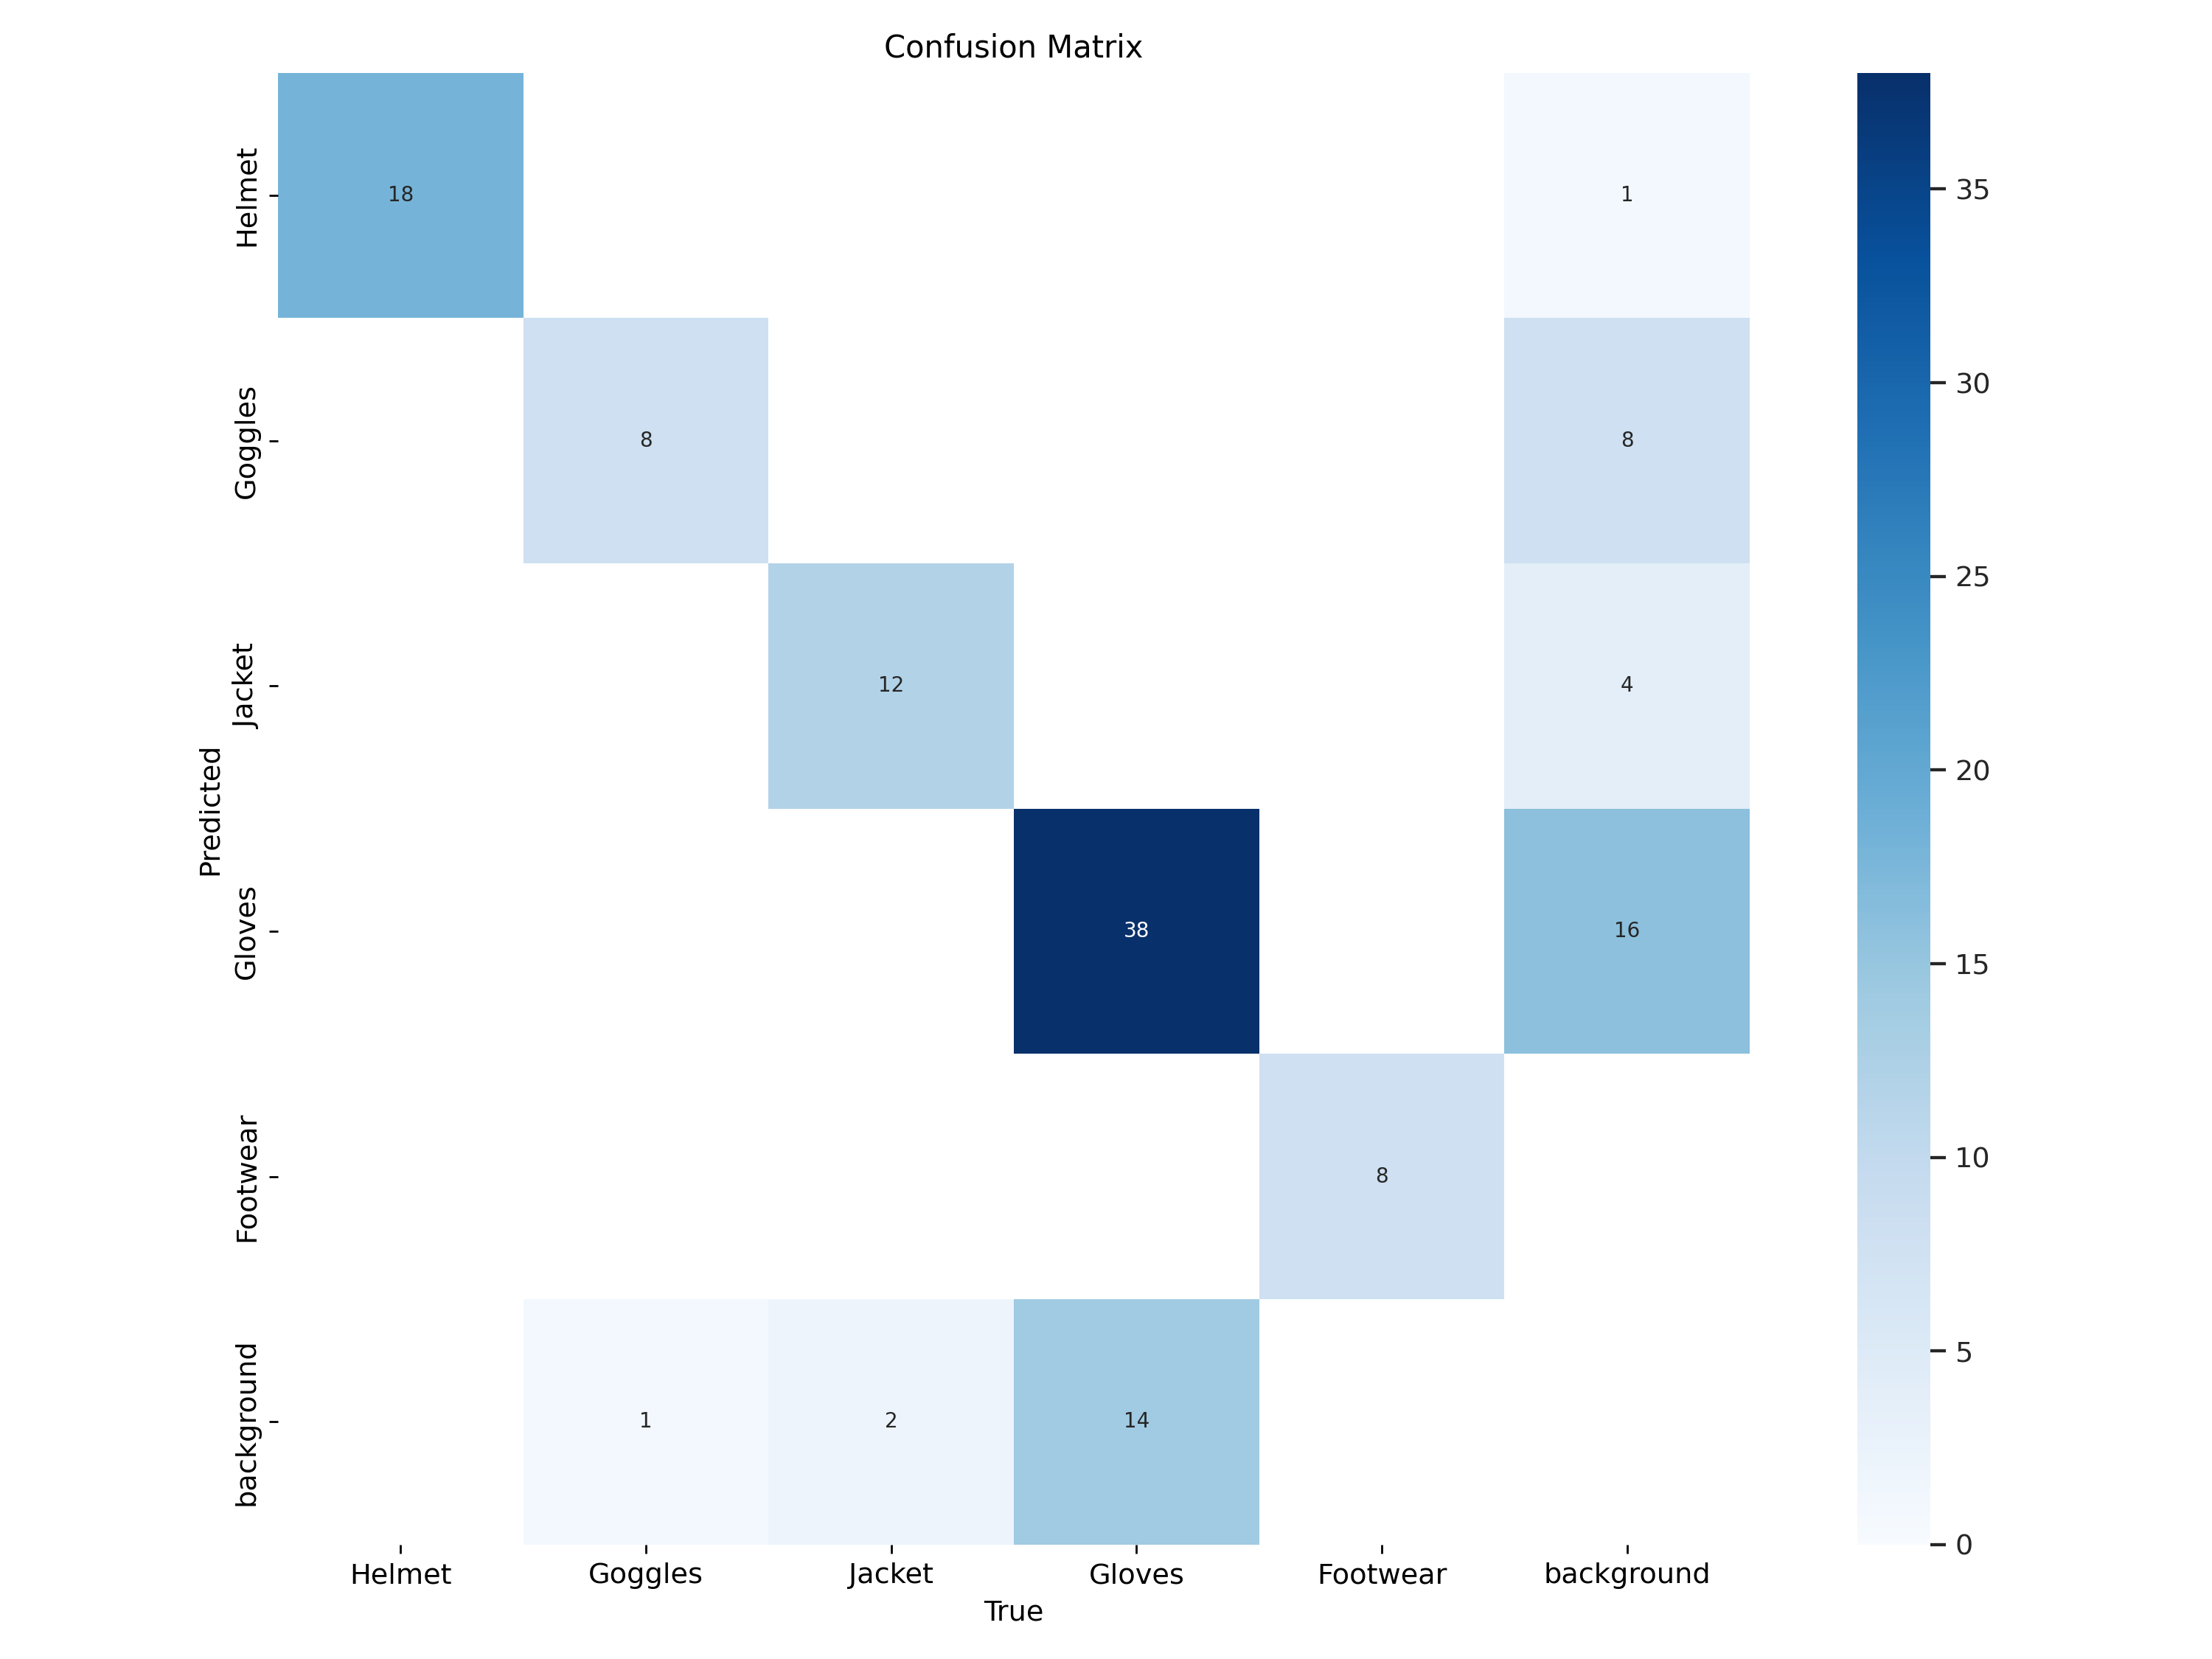

In [34]:
Image(filename='runs/detect/train11/confusion_matrix.png', width=600)

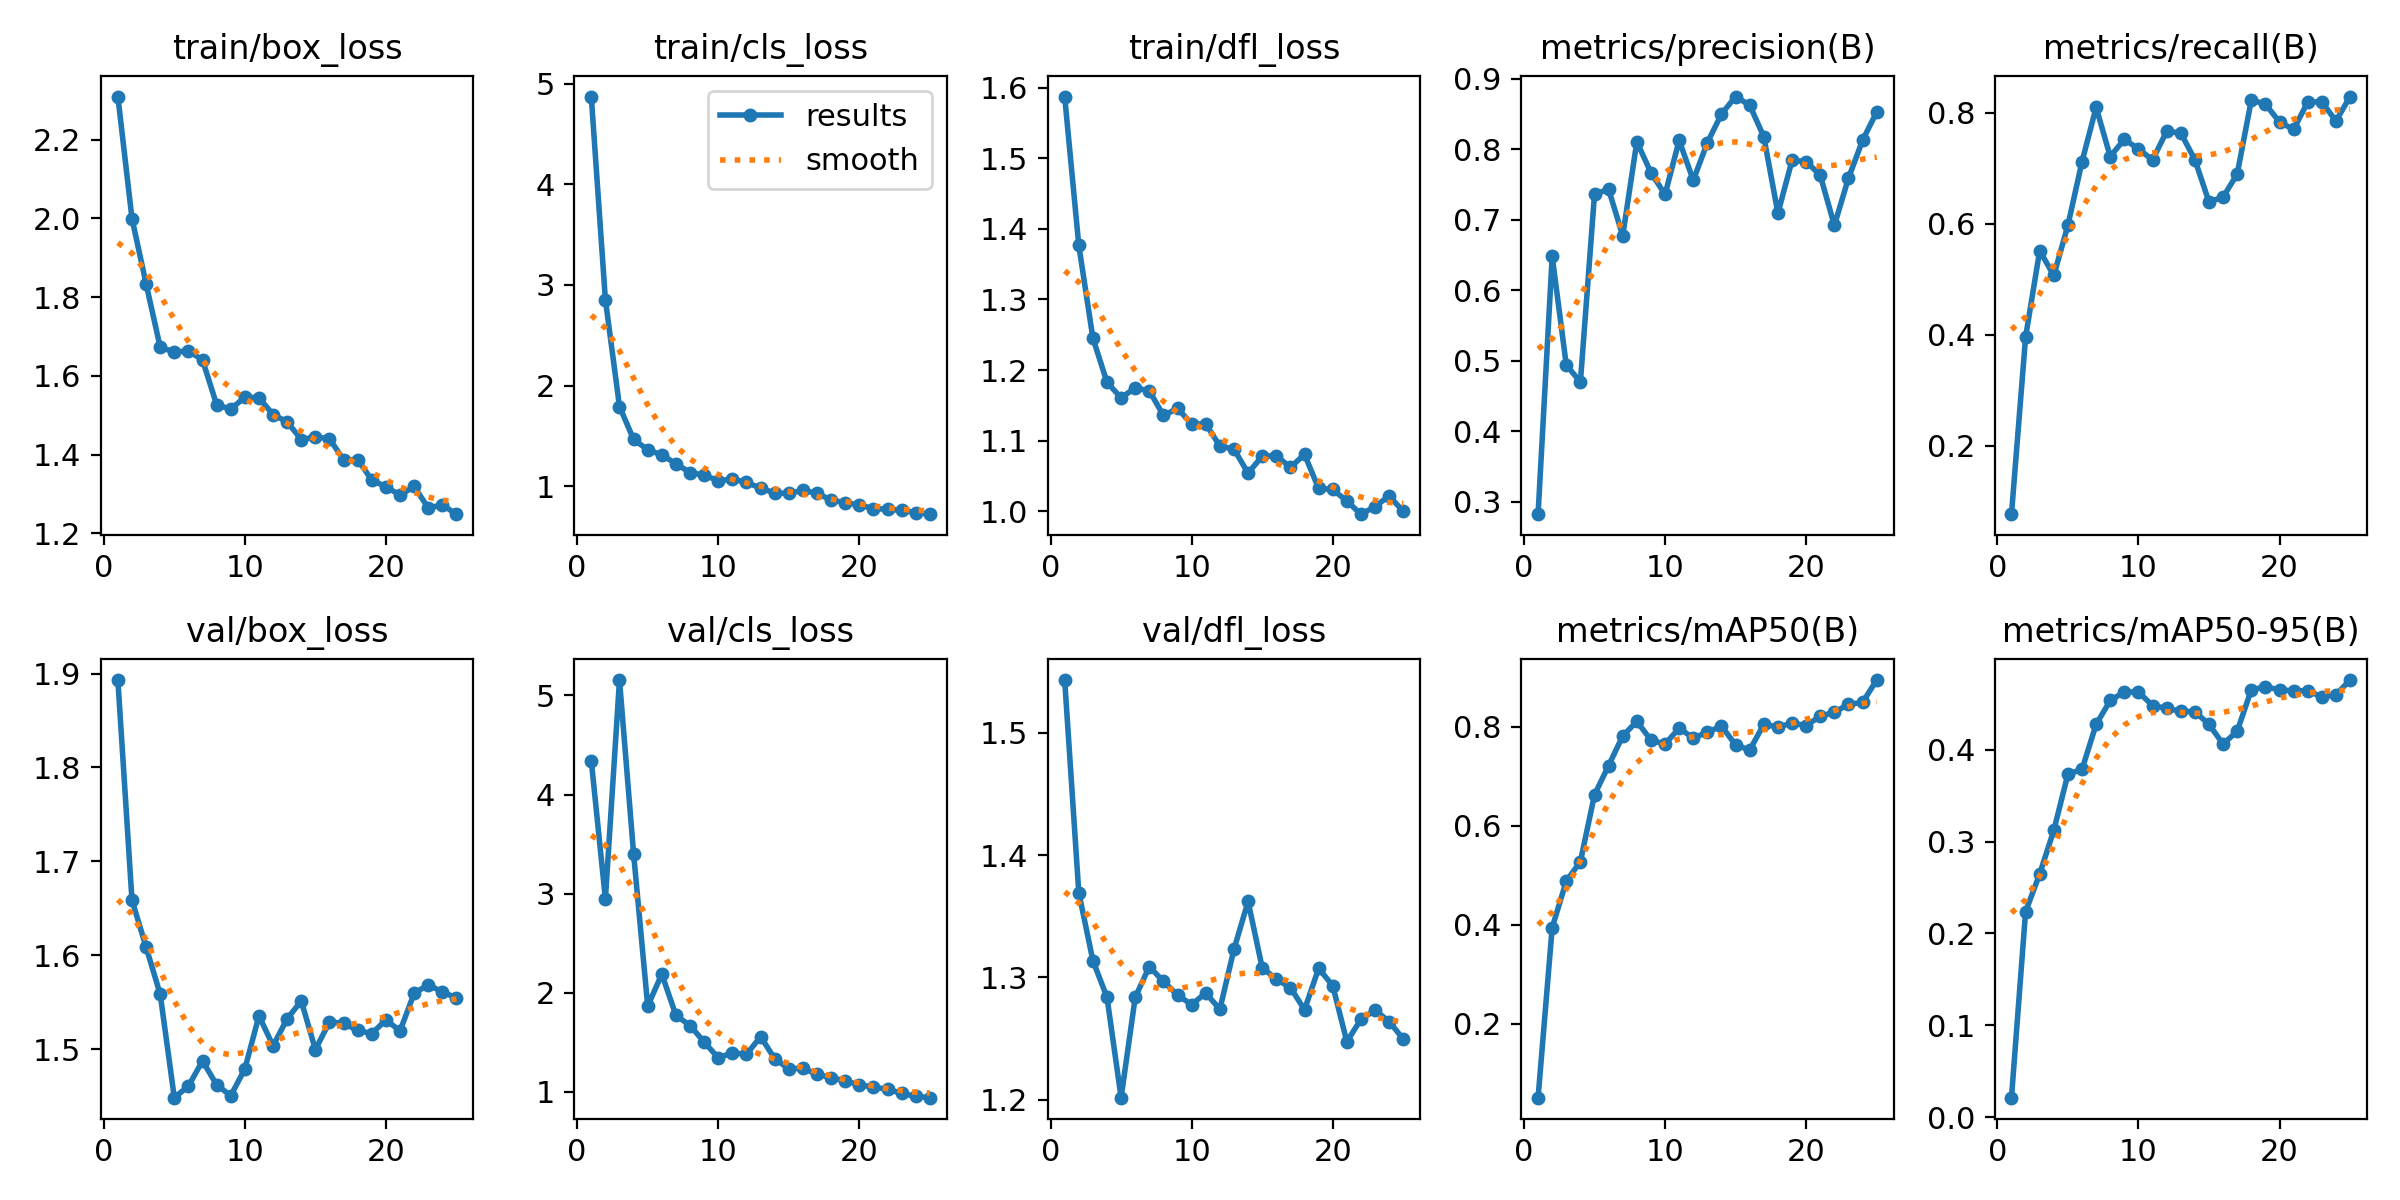

In [35]:
Image(filename='runs/detect/train11/results.png', width=600)

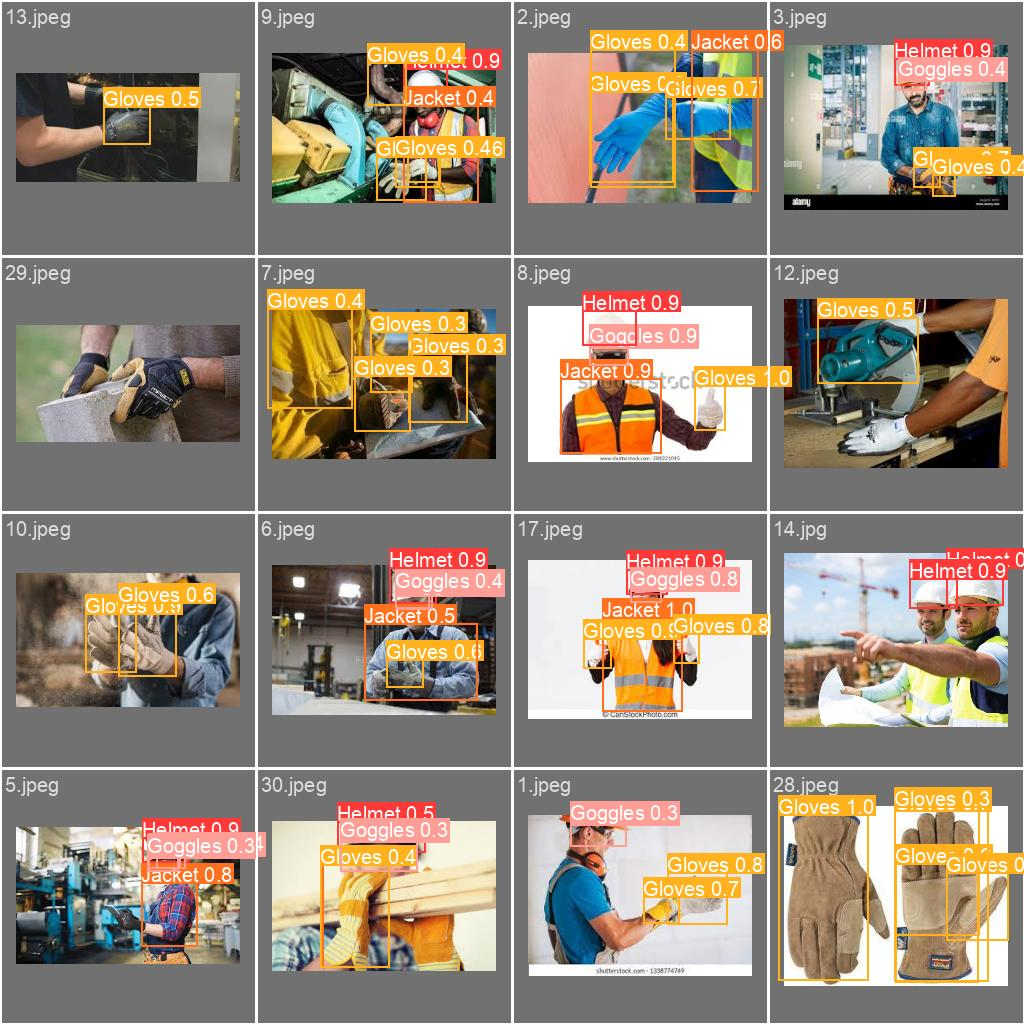

In [36]:
Image(filename='runs/detect/train11/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [38]:
!yolo task=detect mode=val model=runs/detect/train11/weights/best.pt data=/content/drive/MyDrive/YOLO-v8-Object-Detection/data.yaml
# !yolo task=detect mode=val model=runs/detect/train5/weights/best.pt data=/content/datasets/data/data.yaml

Ultralytics YOLOv8.1.11 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127519 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/drive/MyDrive/YOLO-v8-Object-Detection/data/valid/labels.cache... 31 images, 0 backgrounds, 0 corrupt: 100% 31/31 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:01<00:00,  1.15it/s]
                   all         31        101      0.859      0.831      0.884      0.476
                Helmet         31         18      0.927          1      0.995      0.693
               Goggles         31          9      0.862        0.7      0.764      0.337
                Jacket         31         14      0.776      0.857      0.894      0.572
                Gloves         31         52      0.776      0.598      0.773      0.387
              Footwear         31          8      0.952          1      0.995      0.388
Speed: 0.4ms preproc

## Inference with Custom Model

In [39]:
!yolo task=detect mode=predict model=runs/detect/train11/weights/best.pt conf=0.25 source=/content/drive/MyDrive/YOLO-v8-Object-Detection/data/test/images

Ultralytics YOLOv8.1.11 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127519 parameters, 0 gradients, 28.4 GFLOPs

image 1/31 /content/drive/MyDrive/YOLO-v8-Object-Detection/data/test/images/1.jpeg: 192x224 1 Goggles, 2 Glovess, 67.0ms
image 2/31 /content/drive/MyDrive/YOLO-v8-Object-Detection/data/test/images/10.jpeg: 160x224 2 Glovess, 68.2ms
image 3/31 /content/drive/MyDrive/YOLO-v8-Object-Detection/data/test/images/11.jpeg: 224x224 2 Glovess, 8.9ms
image 4/31 /content/drive/MyDrive/YOLO-v8-Object-Detection/data/test/images/12.jpeg: 192x224 2 Glovess, 9.0ms
image 5/31 /content/drive/MyDrive/YOLO-v8-Object-Detection/data/test/images/13.jpeg: 128x224 1 Gloves, 66.4ms
image 6/31 /content/drive/MyDrive/YOLO-v8-Object-Detection/data/test/images/14(1).jpeg: 224x224 1 Gloves, 8.8ms
image 7/31 /content/drive/MyDrive/YOLO-v8-Object-Detection/data/test/images/14.jpg: 192x224 2 Helmets, 1 Gloves, 8.6ms
image 8/31 /content/drive/MyDrive/YOLO

In [40]:
pwd

'/content/drive/MyDrive/YOLO-v8-Object-Detection'

In [41]:
ls


content/   LICENSE            Yolov8_object_detection_on_custom_dataset.ipynb
data/      README.md          yolov8s.pt
data.yaml  runs/              yolov8s.pt.7f550ed28b304a56918b46de7efaff0b.partial
data.zip   YOLO_v8_CMD.ipynb
dog.jpeg   yolov8n.pt


**NOTE:** Let's take a look at few results.

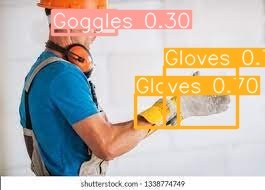

runs/detect/predict4/1.jpeg



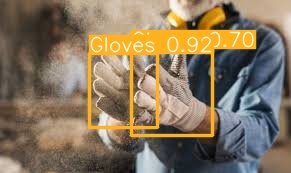

runs/detect/predict4/10.jpeg



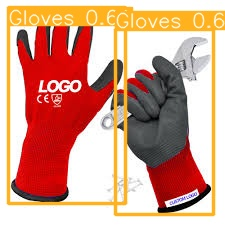

runs/detect/predict4/11.jpeg



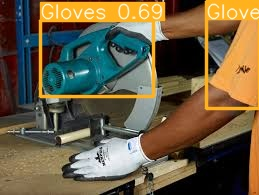

runs/detect/predict4/12.jpeg



In [52]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('runs/detect/predict4/*.jpeg')[:4]:
# for image_path in glob.glob('runs/detect/val2/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print(f"{image_path}\n")